In [1]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns',None)
from collections import defaultdict
%matplotlib inline

In [2]:
#importing the dataset
df = pd.read_csv("./survey-results-public.csv")
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

### Looking at the data above, we can get an insight that the column CousinEducation, which is mentioning the suggestions given by the individuals could help us figure out what's important for a person to dive into the field

In [3]:
df_schema = pd.read_csv('./survey-results-schema.csv')
df_schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


### Questions that were put to the survey participants could be seen below

In [4]:
print(list(df_schema[df_schema['Column']=='CousinEducation']['Question'])[0])

Let's pretend you have a distant cousin. They are 24 years old, have a college degree in a field not related to computer programming, and have been working a non-coding job for the last two years. They want your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to your cousin?
Let's pretend you have a distant cousin named Robert. He is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. He wants your advice on how to switch to a career as a software developer. Which of the following options would you most strongly recommend to Robert?
Let's pretend you have a distant cousin named Alice. She is 24 years old, has a college degree in a field not related to computer programming, and has been working a non-coding job for the last two years. She wants your advice on how to switch to a career as a software developer. Which of 

In [5]:
'''
Here we can see what people are suggesting in the first column
and
How many are suggesting that thing in the corresponding row of the second column
'''

study_mode = df['CousinEducation'].value_counts().reset_index()
study_mode.head(10)

,index,CousinEducation
0,Take online courses; Buy books and work throug...,711
1,Take online courses,551
2,None of these,523
3,Take online courses; Part-time/evening courses...,479
4,Take online courses; Bootcamp; Part-time/eveni...,465
5,Other,403
6,Return to college; Take online courses; Part-t...,384
7,Take online courses; Contribute to open source...,379
8,Take online courses; Contribute to open source...,364
9,Take online courses; Contribute to open source...,324


In [6]:
#Renaming the columns
study_mode.rename(columns={'index':'Method','CousinEducation':'Count'},inplace = True)
study_mode.head(10)

,Method,Count
0,Take online courses; Buy books and work throug...,711
1,Take online courses,551
2,None of these,523
3,Take online courses; Part-time/evening courses...,479
4,Take online courses; Bootcamp; Part-time/eveni...,465
5,Other,403
6,Return to college; Take online courses; Part-t...,384
7,Take online courses; Contribute to open source...,379
8,Take online courses; Contribute to open source...,364
9,Take online courses; Contribute to open source...,324


##### Since there are a number of values in almost each cell of the Method column, the curated list of individual methods is mentioned underneath

In [7]:
possible_methods = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

In [8]:
def total_counts(df,method,count,values):
    '''
    This function returns a dataframe having all the
    suggested methods with their corresponding total count
    
    Input:
    df     - Dataframe that needs to be traversed
    method - Method column
    count  - Counts column
    values - List of all possible methods
    
    Output:
    counts_df - Dataframe with two columns, one with method name and the other with corresponding count
    '''
    
    counts_dict = defaultdict(int)
    
    for i in values:
        for j in range(df.shape[0]):
            if i in df[method][j]:
                counts_dict[i] += int(df[count][j])
    counts_df = pd.DataFrame(pd.Series(counts_dict)).reset_index()
    counts_df.columns = [method,count]
    counts_df.sort_values(count,ascending=False,inplace=True)
    return counts_df

In [9]:
counts_df = total_counts(study_mode,'Method','Count',possible_methods)
counts_df.head(10)

,Method,Count
0,Take online courses,15246
1,Buy books and work through the exercises,11750
3,Part-time/evening courses,7517
5,Contribute to open source,7423
7,Bootcamp,5276
6,Conferences/meet-ups,5244
4,Return to college,5017
9,Participate in online coding competitions,3610
8,Get a job as a QA tester,3376
11,Participate in hackathons,2747


<AxesSubplot:xlabel='Count', ylabel='Method'>

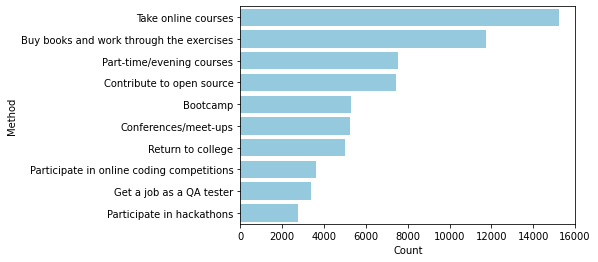

In [10]:
sns.barplot(data = counts_df[:10],y = 'Method',x = 'Count',orient='h',color='skyblue')

### The major take away from the above plot is that most of the respondants have suggested to go for online courses to enter into the field

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## How does the formal education play a role?

In [11]:
edu_jobSat_df = df.dropna(subset=['FormalEducation','Salary'],axis = 'rows')

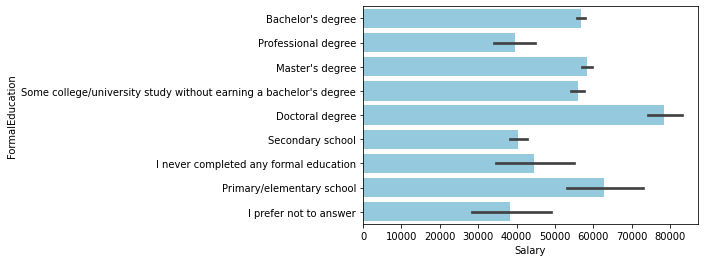

In [12]:
sns.barplot(data=edu_jobSat_df,x = 'Salary',y = 'FormalEducation', orient='h',color='skyblue');

### Based on the above plot, we can say that people with a doctoral degree earn the highest

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## Does enrolling into a bootcamp helps?

In [13]:
df.TimeAfterBootcamp.unique()

array([nan,
       'I already had a job as a developer when I started the program',
       'Immediately upon graduating', 'One to three months',
       'Less than a month',
       'I got a job as a developer before completing the program',
       'Six months to a year', 'Four to six months',
       "I haven't gotten a job as a developer yet", 'Longer than a year'],
      dtype=object)

In [14]:
bootcamp_df = df[~df['TimeAfterBootcamp'].isnull()]
not_bootcamp_df = df[df['TimeAfterBootcamp'].isnull()]

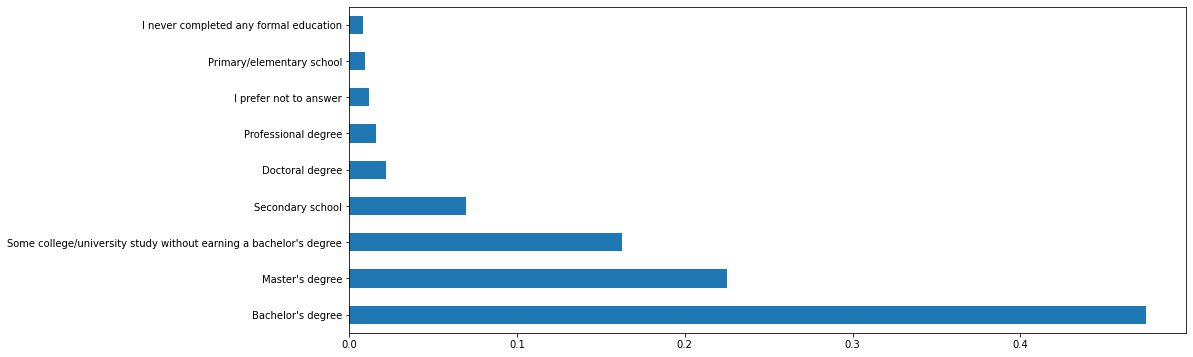

In [15]:
plt.figure(figsize=(15,6))
(bootcamp_df['FormalEducation'].value_counts()/(bootcamp_df.shape[0]-sum(bootcamp_df['FormalEducation'].isnull()))).plot.barh()
plt.show()

<AxesSubplot:>

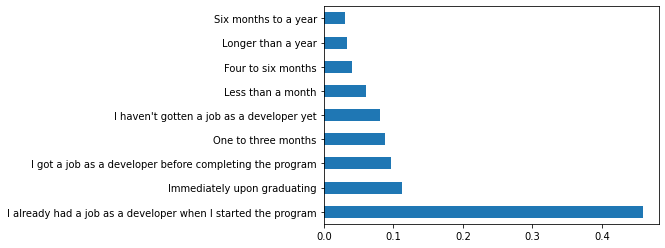

In [16]:
(bootcamp_df['TimeAfterBootcamp'].value_counts()/(bootcamp_df.shape[0]-sum(bootcamp_df['TimeAfterBootcamp'].isnull()))).plot.barh()

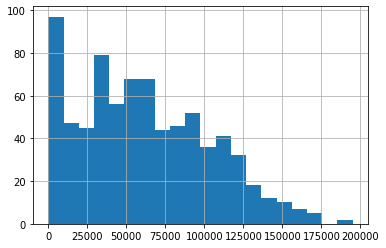

In [17]:
bootcamp_df['Salary'].hist(bins = 20);

### Major take aways regarding the bootcamp:

##### - The above plots clearly state that bootcamp doesn't affect the career much
##### - Most of the people who took a bootcamp course have a Bachelor's Degree
##### - The salary did not change much after the bootcamp
##### - Most of the people already had a job before the bootcamp itself

#### ----------------------------------------------------------------------------------------------------------------------------------------------------------